
LIBROSA

Spectrograms = how the audio spectrum varies as a function of time.

    2D np arrays
    first axis is frequency, second axis is time
    sr = sampling rate (Hz)
    frame = short audio clip (spectrgram column)
    n_fft = samples per frame
    hop_length = nr of samples between frames

Default settings:

    sr: 22050
    n_fft: 2048
    hop_length: 512

Spectral features are used to analyze harmony or timbre.

In [2]:
#!pip install librosa
import librosa
from librosa import display
import IPython.display as ipd
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ipd.Audio('speech_emotion_recognition/data/Actor_01/03-01-01-01-01-01-01.wav')

# FEATURES

In [19]:
ylib1, sr1 = librosa.load('speech_emotion_recognition/data/Actor_01/03-01-01-01-01-01-01.wav')

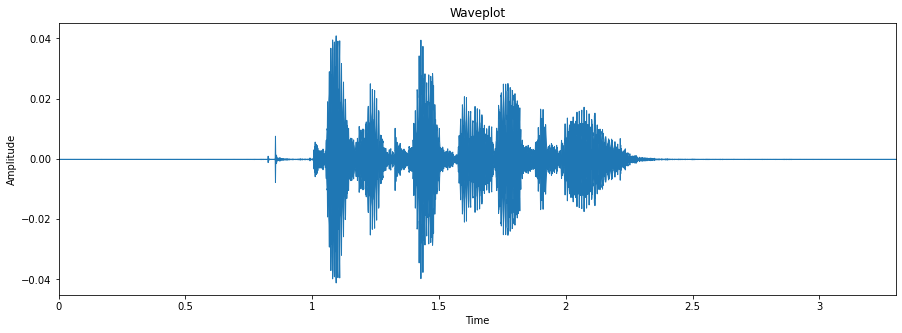

In [35]:
# Plot the waveform of the first recording

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y=ylib1, sr=sr1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Waveplot")
plt.show()

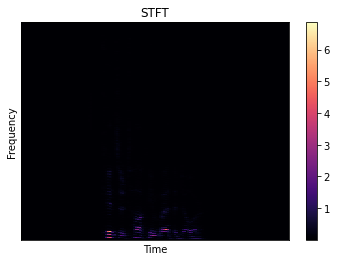

In [34]:
# short time fourier transform

stft = librosa.stft(y=ylib1)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr1)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT")
plt.colorbar()
plt.show()

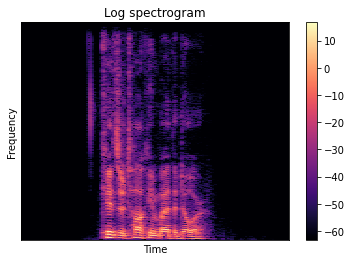

In [32]:
# log spectrogram

log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr1)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Log spectrogram")
plt.colorbar()
plt.show()

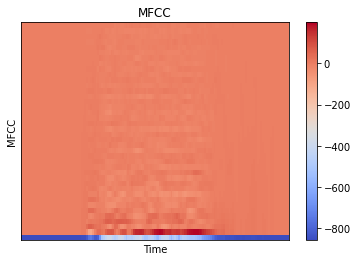

In [33]:
# MFCC

mfcc = librosa.feature.mfcc(y=ylib1, n_mfcc=40)
librosa.display.specshow(mfcc, sr=sr1)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.title("MFCC")
plt.colorbar()
plt.show()

In [24]:
# CQT (constant-q transform) measures the energy in each pitch. Can be used instead of stft.
librosa.cqt(y=ylib1, sr=sr1)

array([[-1.0053458e-06-1.3582038e-08j, -2.5118661e-07+5.0236207e-07j,
        -7.7287979e-07+3.3558868e-07j, ...,
        -3.8303736e-07-1.4796158e-05j, -1.4354778e-05-2.3273954e-06j,
        -4.9579658e-06+1.3474271e-05j],
       [-2.9357686e-06-1.4196180e-08j, -1.3780466e-06+3.0863980e-06j,
         3.0900298e-06+3.2959699e-06j, ...,
         3.9641986e-06-9.8185683e-06j, -8.1962580e-06-3.7324223e-06j,
        -3.1261402e-06+7.7347167e-06j],
       [ 9.2160853e-06+2.3750576e-07j,  8.6463606e-06-4.8790280e-06j,
         4.7400654e-06-1.0535669e-05j, ...,
        -7.7150080e-06+2.9201631e-06j, -5.7824091e-06+6.2698655e-06j,
        -1.4805399e-06+8.6809832e-06j],
       ...,
       [ 3.0372698e-06+9.1004573e-08j,  0.0000000e+00+0.0000000e+00j,
         2.0150715e-07+3.6221510e-07j, ...,
         3.2332935e-06+2.3031944e-06j,  2.5797697e-09-1.0109831e-08j,
         0.0000000e+00+0.0000000e+00j],
       [ 3.1370269e-06-8.9531945e-08j,  0.0000000e+00+0.0000000e+00j,
        -2.8907053e-07

In [31]:
# 
chroma = librosa.feature.chroma_stft(y=ylib1, sr=sr1)
chroma

array([[0.3650913 , 0.41162342, 0.77867085, ..., 1.        , 1.        ,
        0.99323344],
       [0.58672327, 0.6175836 , 0.7685106 , ..., 0.95594585, 0.9751174 ,
        1.        ],
       [0.99420285, 1.        , 1.        , ..., 0.8580162 , 0.8310617 ,
        0.765532  ],
       ...,
       [0.31204128, 0.35525352, 0.5392974 , ..., 0.77172107, 0.8072831 ,
        0.9520087 ],
       [0.27048963, 0.32149792, 0.7163922 , ..., 0.65048146, 0.57783747,
        0.5821327 ],
       [0.28387696, 0.3338067 , 0.93178666, ..., 0.99238014, 0.9289581 ,
        0.7309194 ]], dtype=float32)

In [25]:
# fft spectrum
fft = np.fft.fft(ylib1)
fft

array([ 0.06667195+8.11850587e-16j, -0.0600817 +6.52619435e-04j,
        0.03079933-1.01554493e-02j, ...,  0.00614893-2.03039672e-02j,
        0.03079933+1.01554493e-02j, -0.0600817 -6.52619435e-04j])

In [26]:
# contribution of each frequency to the sound
magnitude = np.abs(fft)
magnitude

array([0.06667195, 0.06008524, 0.03243042, ..., 0.02121463, 0.03243042,
       0.06008524])

In [28]:
# linspace: nr of evenly spaced nrs in an interval between 0 Hz and sr Hz
frequency = np.linspace(0, sr1, len(magnitude))
frequency

array([0.00000000e+00, 3.02730755e-01, 6.05461510e-01, ...,
       2.20493945e+04, 2.20496973e+04, 2.20500000e+04])

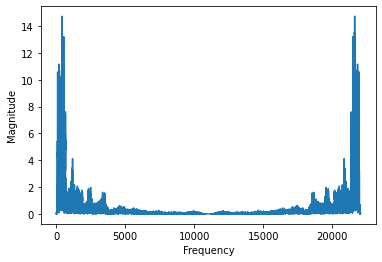

In [29]:
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

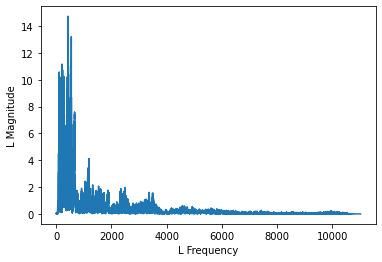

In [30]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("L Frequency")
plt.ylabel("L Magnitude")
plt.show()

# FEATURE EXTRACTION

In [15]:
def extract_audio_features(file):
    filenames = []
    y_lib_list = []
    sr_list = []
    mfcc_list = []
    stft_list = []

    filename = file[-24:]
    filenames.append(filename)

    y_lib, sample_rate = librosa.load(file, res_type='kaiser_fast')
    y_lib_list.append(y_lib)
    sr_list.append(sample_rate)

    mfcc = np.mean(librosa.feature.mfcc(y=y_lib, n_mfcc=40).T, axis=0)
    mfcc_list.append(np.hstack(mfcc))

    stft = librosa.stft(y=y_lib)
    stft_list.append(stft)

    features_df = pd.DataFrame()
    features_df['filename'] = filenames
    features_df['y_lib'] = y_lib_list
    features_df['sr'] = sr_list
    features_df['mfcc'] = mfcc_list
    features_df['stft'] = stft_list

    return features_df

features_1 = extract_audio_features('speech_emotion_recognition/data/Actor_01/03-01-01-01-01-01-01.wav')
features_1


,filename,y_lib,sr,mfcc,stft
0,03-01-01-01-01-01-01.wav,"[0.0, 0.0, -4.2085435e-10, 2.8233578e-09, -8.8...",22050,"[-700.3989, 58.63021, -3.025852, 16.040241, 4....","[[(0.00011209303+0j), (5.9887778e-05+0j), (-4...."


In [ ]:
mfcc_stack = np.hstack(file1['mfcc']) 
mfcc_stack

type(file1['mfcc']) #series
type(mfcc_stack) #array

# MODELS

In [65]:
import joblib
X = joblib.load('speech_emotion_recognition/features/X.joblib')
y = joblib.load('speech_emotion_recognition/features/y.joblib')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1152, 40) (288, 40) (1152,) (288,)


In [70]:
x_train

array([[-6.6921820e+02,  7.2773331e+01, -6.1395121e+00, ...,
         4.7175136e+00,  1.6639346e+00,  5.3003061e-01],
       [-5.8560120e+02,  4.3378284e+01, -2.4321405e+01, ...,
         1.0961093e+00,  1.2821494e+00,  1.7060469e+00],
       [-4.3601199e+02,  3.5549870e+01, -8.8900728e+00, ...,
         2.2599611e+00,  2.4389882e+00,  3.9007530e+00],
       ...,
       [-6.0148627e+02,  3.8448559e+01, -2.2685497e+01, ...,
        -2.6102071e+00, -1.5435365e+00, -1.2489963e+00],
       [-6.4587891e+02,  3.7215260e+01, -9.5567465e+00, ...,
         3.9133975e-01, -4.2947233e-01, -1.1565988e+00],
       [-7.1005359e+02,  7.0618843e+01, -1.5569706e+00, ...,
        -3.7726026e+00, -3.5695100e+00, -4.7873240e+00]], dtype=float32)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

dtree_accuracy = round(accuracy_score(y_true=y_test, y_pred=dtree_pred),3)
print(classification_report(y_test, dtree_pred)) #acc 0.42

              precision    recall  f1-score   support

           0       0.35      0.24      0.29        25
           1       0.65      0.56      0.60        43
           2       0.26      0.29      0.28        38
           3       0.33      0.27      0.30        30
           4       0.58      0.58      0.58        43
           5       0.38      0.39      0.38        36
           6       0.24      0.29      0.26        31
           7       0.34      0.40      0.37        42

    accuracy                           0.40       288
   macro avg       0.39      0.38      0.38       288
weighted avg       0.41      0.40      0.40       288



In [176]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', alpha=0.001, shuffle=True, verbose=True, momentum=0.8)
mlp_model.fit(x_train, y_train)
mlp_pred = mlp_model.predict(x_test)
mlp_accuracy = mlp_model.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(mlp_accuracy*100)) # 47.57%

Iteration 1, loss = 24.44774461
Iteration 2, loss = 17.33071449
Iteration 3, loss = 11.30893585
Iteration 4, loss = 7.76286081
Iteration 5, loss = 6.21177349
Iteration 6, loss = 4.51893830
Iteration 7, loss = 3.93217061
Iteration 8, loss = 3.39891511
Iteration 9, loss = 3.11825296
Iteration 10, loss = 2.90909514
Iteration 11, loss = 2.69266311
Iteration 12, loss = 2.59788185
Iteration 13, loss = 2.50757550
Iteration 14, loss = 2.44627645
Iteration 15, loss = 2.39088216
Iteration 16, loss = 2.32239855
Iteration 17, loss = 2.26346250
Iteration 18, loss = 2.23989484
Iteration 19, loss = 2.12759439
Iteration 20, loss = 2.04917911
Iteration 21, loss = 2.00236230
Iteration 22, loss = 1.92834102
Iteration 23, loss = 1.90992954
Iteration 24, loss = 1.83061219
Iteration 25, loss = 1.81165633
Iteration 26, loss = 1.78265255
Iteration 27, loss = 1.75782667
Iteration 28, loss = 1.74690894
Iteration 29, loss = 1.70955792
Iteration 30, loss = 1.69767817
Iteration 31, loss = 1.68862760
Iteration 32, 

In [179]:
mlp_clas_report = pd.DataFrame(
    classification_report(y_test, mlp_pred, output_dict=True)
).transpose()
clas_report.to_csv("speech_emotion_recognition/features/mlp_clas_report.csv")
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.23      0.36      0.28        25
           1       0.50      0.30      0.38        43
           2       0.53      0.26      0.35        38
           3       0.23      0.33      0.27        30
           4       0.54      0.70      0.61        43
           5       0.82      0.25      0.38        36
           6       0.42      0.35      0.39        31
           7       0.46      0.74      0.56        42

    accuracy                           0.43       288
   macro avg       0.47      0.41      0.40       288
weighted avg       0.48      0.43      0.42       288



(1152, 40) (288, 40) (1152,) (288,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           768       
_________________________________________________________________
activation (Activation)      (None, 40, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40968     
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 41,736
Trainable params: 41,736
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 16ms/step - loss: 12.4743 

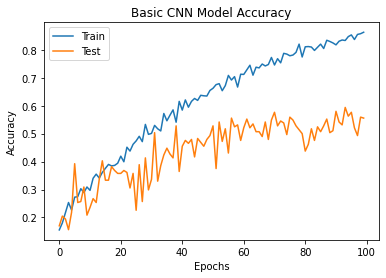

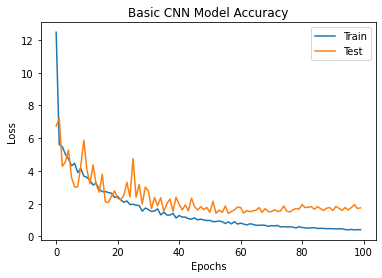

Predictions[0]: [1.5312135e-21 1.1051887e-18 9.9855918e-01 2.2891309e-05 9.8947994e-04
 4.2781464e-04 6.7156992e-07 1.5446435e-12]


In [8]:
import joblib
X = joblib.load('speech_emotion_recognition/features/X.joblib')
y = joblib.load('speech_emotion_recognition/features/y.joblib')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


from tensorflow.keras.layers import Conv1D, Activation, Flatten, Dropout, Dense, MaxPooling1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(MaxPooling1D(pool_size=(8)))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv1d (Conv1D)              (None, 40, 128)           768       
# _________________________________________________________________
# activation (Activation)      (None, 40, 128)           0         
# _________________________________________________________________
# flatten (Flatten)            (None, 5120)              0         
# _________________________________________________________________
# dense (Dense)                (None, 8)                 40968     
# _________________________________________________________________
# activation_1 (Activation)    (None, 8)                 0         
# Total params: 20,872
# Trainable params: 20,872
# Non-trainable params: 0

# tensorflow.keras.utils.plot_model(model, to_file='images/model1.png',show_shapes=True, show_layer_names=True)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=64, epochs=100,
                        validation_data=(x_testcnn, y_test))

train_loss, train_acc = model.evaluate(x_traincnn, y_train)
test_loss, test_acc = model.evaluate(x_testcnn, y_test)

print("Train accuracy:", round(train_acc, 5)) #0.9027
print("Train loss:", round(train_loss, 3)) #0.326

print("Test accuracy:", round(test_acc, 5)) #0.5555
print("Test loss:", round(test_loss, 3)) #1.748

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

## PREDICTIONS
from sklearn.metrics import confusion_matrix
import seaborn as sn

predictions = model.predict(x_testcnn)
print("Predictions[0]:" ,predictions[0])

(1152, 40) (288, 40) (1152,) (288,)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 40968     
_________________________________________________________________
activation_13 (Activation)   (None, 8)                 0         
Total params: 41,736
Trainable params: 41,736
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 13.3001

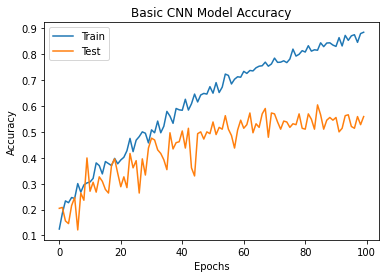

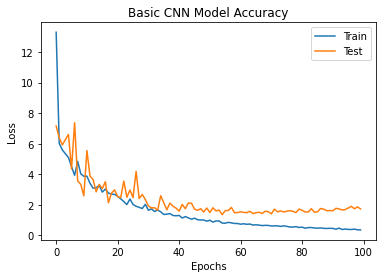

Predictions[0]: [3.7798920e-20 4.3781730e-17 9.9138314e-01 1.3416014e-05 3.9891992e-03
 4.6142787e-03 2.2776062e-08 7.1506250e-13]


In [53]:
import joblib
X = joblib.load('speech_emotion_recognition/features/X.joblib')
y = joblib.load('speech_emotion_recognition/features/y.joblib')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


from tensorflow.keras.layers import Conv1D, Activation, Flatten, Dropout, Dense, MaxPooling1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(MaxPooling1D(pool_size=(8)))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv1d (Conv1D)              (None, 40, 128)           768       
# _________________________________________________________________
# activation (Activation)      (None, 40, 128)           0         
# _________________________________________________________________
# flatten (Flatten)            (None, 5120)              0         
# _________________________________________________________________
# dense (Dense)                (None, 8)                 40968     
# _________________________________________________________________
# activation_1 (Activation)    (None, 8)                 0         
# Total params: 20,872
# Trainable params: 20,872
# Non-trainable params: 0

# tensorflow.keras.utils.plot_model(model, to_file='images/model1.png',show_shapes=True, show_layer_names=True)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=64, epochs=100,
                        validation_data=(x_testcnn, y_test))

train_loss, train_acc = model.evaluate(x_traincnn, y_train)
test_loss, test_acc = model.evaluate(x_testcnn, y_test)

print("Train accuracy:", round(train_acc, 5)) #0.8836
print("Train loss:", round(train_loss, 3)) #0.337

print("Test accuracy:", round(test_acc, 5)) #0.5590
print("Test loss:", round(test_loss, 3)) #1.733

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

## PREDICTIONS
from sklearn.metrics import confusion_matrix
import seaborn as sn

predictions = model.predict(x_testcnn)
print("Predictions[0]:" ,predictions[0])

In [9]:
import joblib
X = joblib.load('speech_emotion_recognition/features/X.joblib')
y = joblib.load('speech_emotion_recognition/features/y.joblib')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


from tensorflow.keras.layers import Conv1D, Activation, Flatten, Dropout, Dense, MaxPooling1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(MaxPooling1D(pool_size=(8)))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()
# Total params: 
# Trainable params: 
# Non-trainable params: 0

# tensorflow.keras.utils.plot_model(model, to_file='images/model1.png',show_shapes=True, show_layer_names=True)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=64, epochs=100,
                        validation_data=(x_testcnn, y_test))

train_loss, train_acc = model.evaluate(x_traincnn, y_train)
test_loss, test_acc = model.evaluate(x_testcnn, y_test)

print("Train accuracy:", round(train_acc, 5)) #0.9027
print("Train loss:", round(train_loss, 3)) #0.326

print("Test accuracy:", round(test_acc, 5)) #0.5555
print("Test loss:", round(test_loss, 3)) #1.748

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("Basic CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

## PREDICTIONS
from sklearn.metrics import confusion_matrix
import seaborn as sn

predictions = model.predict(x_testcnn)
print("Predictions[0]:" ,predictions[0])

array([[-6.1849091e+02,  6.4998726e+01,  4.4063377e+00, ...,
        -1.1544321e-01, -5.4356533e-01,  1.0988687e+00],
       [-3.5542474e+02,  2.6561600e+01, -2.6769884e+01, ...,
         1.9534186e+00, -7.9032898e-01,  1.3813354e+00],
       [-5.2909393e+02,  4.9615078e+01, -4.0779896e+00, ...,
         1.6775117e+00,  2.8151546e+00,  3.3697586e+00],
       ...,
       [-6.3879462e+02,  4.8271980e+01,  1.3976592e+00, ...,
         2.5318856e+00,  3.7959373e+00,  1.7601711e+00],
       [-4.3919495e+02,  2.7056488e+01, -1.9882042e+01, ...,
         7.4069935e-01,  7.6303816e-01,  2.5346978e+00],
       [-4.5659323e+02,  3.5127747e+01, -2.0026295e+01, ...,
         1.2643946e+00,  4.4341314e-01,  1.0379316e-01]], dtype=float32)

(1152, 40) (288, 40) (1152,) (288,)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 40, 64)            384       
_________________________________________________________________
activation_37 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 40, 16)            5136      
_________________________________________________________________
activation_38 (Activation)   (None, 40, 16)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 40, 16)            64        
_________________________________________________________________
flatten_16 (Flatten)         (None, 640)               0         
_________________________________________________________________
dense_16 (Dense) 

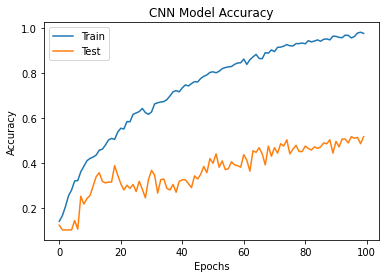

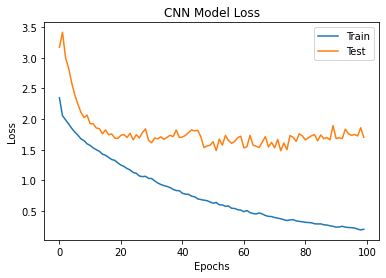

Predictions[0]: 2


In [115]:
import joblib
X = joblib.load('speech_emotion_recognition/features/X.joblib')
y = joblib.load('speech_emotion_recognition/features/y.joblib')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


from tensorflow.keras.layers import Conv1D, Activation, Flatten, Dropout, Dense, MaxPooling1D, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Conv1D(16, 5, padding='same'))
model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(Conv1D(16, 5, padding='same'))
# model.add(MaxPooling1D(pool_size=(8)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()


model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=128, epochs=100,
                        validation_data=(x_testcnn, y_test))

train_loss, train_acc = model.evaluate(x_traincnn, y_train)
test_loss, test_acc = model.evaluate(x_testcnn, y_test)

print("Train accuracy:", round(train_acc, 5)) #0.80816
print("Train loss:", round(train_loss, 3)) #0.551

print("Test accuracy:", round(test_acc, 5)) #060069
print("Test loss:", round(test_loss, 3)) #1.271

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("CNN Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title("CNN Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()


In [149]:
## PREDICTIONS
from sklearn.metrics import confusion_matrix
import seaborn as sn

cnn_pred = model.predict_classes(x_testcnn)
predictions_array = np.array([cnn_pred, y_test])
predictions_df = pd.DataFrame(data=predictions_array) #.flatten())
predictions_df = predictions_df.T
predictions_df = predictions_df.rename(columns={0:'cnn_pred', 1:'y_test'})
predictions_df

,cnn_pred,y_test
0,2,2
1,3,3
2,3,1
3,1,1
4,3,1
...,...,...
283,1,5
284,0,7
285,6,6
286,2,2


In [158]:
# predictions_df = predictions_df.replace({0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgusted', 7:'surprised'})

In [161]:
predictions_df

,cnn_pred,y_test
0,happy,happy
1,sad,sad
2,sad,calm
3,calm,calm
4,sad,calm
...,...,...
283,calm,fearful
284,neutral,surprised
285,disgusted,disgusted
286,happy,happy


In [159]:
y_test_int = y_test.astype(int)
print(classification_report(y_test_int, cnn_pred))

              precision    recall  f1-score   support

           0       0.50      0.28      0.36        25
           1       0.68      0.49      0.57        43
           2       0.62      0.42      0.50        38
           3       0.31      0.37      0.33        30
           4       0.56      0.74      0.64        43
           5       0.51      0.61      0.56        36
           6       0.37      0.42      0.39        31
           7       0.59      0.64      0.61        42

    accuracy                           0.52       288
   macro avg       0.52      0.50      0.50       288
weighted avg       0.53      0.52      0.51       288



In [172]:
clas_report = pd.DataFrame(classification_report(y_test_int, cnn_pred, output_dict=True)).transpose()
clas_report.to_csv("speech_emotion_recognition/features/cnn_clas_report.csv")

,precision,recall,f1-score,support
0,0.500000,0.280000,0.358974,25.000000
1,0.677419,0.488372,0.567568,43.000000
2,0.615385,0.421053,0.500000,38.000000
3,0.305556,0.366667,0.333333,30.000000
4,0.561404,0.744186,0.640000,43.000000
5,0.511628,0.611111,0.556962,36.000000
6,0.371429,0.419355,0.393939,31.000000
7,0.586957,0.642857,0.613636,42.000000
accuracy,0.517361,0.517361,0.517361,0.517361
macro avg,0.516222,0.496700,0.495552,288.000000


[[ 7  4  0  7  1  2  4  0]
 [ 3 21  1 11  2  1  2  2]
 [ 0  0 16  1  8  5  5  3]
 [ 0  4  1 11  0  8  2  4]
 [ 0  0  1  3 32  2  4  1]
 [ 1  1  3  0  5 22  1  3]
 [ 1  1  2  3  5  0 13  6]
 [ 2  0  2  0  4  3  4 27]]


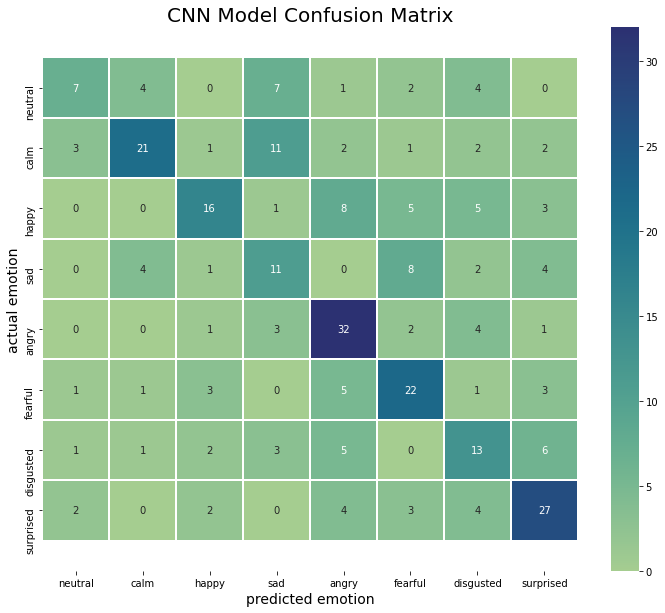

In [166]:
import seaborn as sns 
matrix = confusion_matrix(y_test_int, cnn_pred)
print(matrix)

plt.figure(figsize = (12, 10))

# emotions = {0:'neutral', 1:'calm', 2:'happy', 3:'sad', 4:'angry', 5:'fearful', 6:'disgusted', 7:'surprised'}
emotions = ['neutral','calm','happy','sad','angry','fearful','disgusted','surprised']
cm = pd.DataFrame(matrix)#, index=emotions, columns=emotions)
ax = sns.heatmap(matrix, linecolor='white', cmap='crest', linewidth=1, annot=True, fmt='', xticklabels=emotions, yticklabels=emotions)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('CNN Model Confusion Matrix', size=20)
plt.xlabel('predicted emotion', size=14)
plt.ylabel('actual emotion', size=14)
plt.savefig('speech_emotion_recognition/images/CNN_confusionmatrix.png')
plt.show()

In [62]:
y_train, y_test, predictions

(array([1, 6, 5, ..., 7, 7, 1]),
 array([2, 3, 1, 1, 1, 4, 1, 7, 2, 1, 4, 7, 4, 2, 5, 4, 4, 7, 2, 2, 7, 6,
        6, 4, 5, 3, 1, 3, 2, 0, 4, 7, 4, 6, 5, 2, 2, 2, 2, 7, 1, 1, 2, 1,
        4, 7, 2, 2, 1, 5, 1, 6, 6, 2, 0, 1, 3, 7, 2, 7, 5, 1, 7, 1, 3, 7,
        2, 0, 4, 4, 6, 7, 4, 3, 0, 6, 0, 3, 4, 3, 1, 6, 7, 3, 3, 5, 6, 4,
        5, 7, 7, 2, 4, 0, 1, 6, 0, 3, 6, 2, 1, 5, 3, 4, 2, 7, 3, 4, 4, 5,
        1, 1, 6, 7, 0, 7, 6, 6, 0, 3, 1, 6, 5, 0, 6, 0, 5, 4, 2, 0, 4, 1,
        0, 5, 1, 2, 1, 3, 7, 2, 2, 7, 4, 6, 5, 5, 2, 1, 3, 1, 3, 5, 5, 5,
        0, 6, 5, 1, 7, 1, 7, 3, 5, 5, 6, 2, 2, 0, 3, 7, 7, 5, 1, 2, 6, 6,
        4, 5, 0, 1, 7, 7, 7, 6, 0, 7, 7, 2, 3, 0, 4, 4, 6, 7, 1, 1, 1, 6,
        7, 2, 0, 4, 0, 5, 1, 4, 3, 7, 7, 5, 2, 3, 0, 4, 5, 4, 4, 7, 5, 4,
        2, 4, 2, 3, 5, 5, 7, 2, 5, 4, 6, 0, 5, 1, 4, 4, 1, 4, 2, 1, 1, 7,
        6, 4, 5, 7, 6, 3, 4, 6, 2, 6, 1, 4, 0, 7, 4, 7, 4, 3, 7, 3, 1, 0,
        7, 0, 5, 1, 5, 4, 5, 1, 3, 3, 2, 6, 3, 5, 1, 3, 1, 2, 4, 5, 7, 6,
     

In [77]:
##### DATAFLAIR #####

import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X, sample_rate = librosa.load(file_name)
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("speech_emotion_recognition/data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=42)


emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'sad', 'angry','fearful', 'disgust', 'surprised']

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

print((x_train.shape[0], x_test.shape[0])) #(1008, 336)

print(f'Features extracted: {x_train.shape[1]}') #180

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100)) #58.04%

## This model used more features (180 instead of only 40 of mfcc) but the accuracy was similar to that of previous models that used only 1 feature (mfcc).

(1008, 336)
Features extracted: 180
Accuracy: 58.04%


# FEATURES

In [79]:
import pandas as pd
df = pd.read_csv('speech_emotion_recognition/features/df_features.csv')
df.head()

,file,gender,emotion,intensity
0,03-01-08-01-01-02-07.wav,male,surprised,normal
1,03-01-05-02-02-01-07.wav,male,angry,strong
2,03-01-08-02-02-01-07.wav,male,surprised,strong
3,03-01-04-02-02-01-07.wav,male,sad,strong
4,03-01-02-02-01-01-07.wav,male,calm,strong


,gender,emotion,actor,path
1435,female,angry,16,speech_emotion_recognition/data/Actor_16/03-01...
1436,female,angry,16,speech_emotion_recognition/data/Actor_16/03-01...
1437,female,neutral,16,speech_emotion_recognition/data/Actor_16/03-01...
1438,female,angry,16,speech_emotion_recognition/data/Actor_16/03-01...
1439,female,happy,16,speech_emotion_recognition/data/Actor_16/03-01...


In [95]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "speech_emotion_recognition/data/"
actor_folders = os.listdir(audio) #list files in audio directory
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)


# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgusted', 8:'surprised'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.tail()
#audio_df.to_csv('speech_emotion_recognition/features/df_features_new.csv')

# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]

    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-71.24056, -71.24056, -71.24056, -71.24056, -..."
1,"[-47.766712, -47.74748, -47.73967, -47.692028,..."
2,"[-60.485992, -59.934505, -60.186676, -60.10806..."
3,"[-63.092587, -63.0381, -63.051067, -63.22125, ..."
4,"[-80.093185, -79.65134, -79.42426, -80.3045, -..."


In [96]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)
df_combined.head()

,gender,emotion,actor,path,0,1,2,3,4,5,...,249,250,251,252,253,254,255,256,257,258
0,male,surprised,7,speech_emotion_recognition/data/Actor_07/03-01...,-71.240562,-71.240562,-71.240562,-71.240562,-71.240562,-71.240562,...,-68.867027,-67.954353,-68.300720,-69.291161,-68.961502,-69.286217,-69.054947,-68.758636,-68.525879,-68.302597
1,male,angry,7,speech_emotion_recognition/data/Actor_07/03-01...,-47.766712,-47.747478,-47.739670,-47.692028,-47.557163,-47.653172,...,-47.767704,-47.780605,-47.777912,-47.654083,-47.543221,-47.549904,-47.648167,-47.690197,-47.649849,-47.592438
2,male,surprised,7,speech_emotion_recognition/data/Actor_07/03-01...,-60.485992,-59.934505,-60.186676,-60.108067,-59.578617,-59.699829,...,-61.241028,-61.257019,-61.219849,-61.292366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,sad,7,speech_emotion_recognition/data/Actor_07/03-01...,-63.092587,-63.038101,-63.051067,-63.221249,-63.304886,-63.205402,...,-33.426060,-34.997425,-36.529114,-38.126308,-38.745583,-39.589458,-39.853516,-39.855980,-41.325920,-43.238258
4,male,calm,7,speech_emotion_recognition/data/Actor_07/03-01...,-80.093185,-79.651337,-79.424263,-80.304497,-80.073662,-79.389290,...,-54.594822,-55.392765,-55.956108,-55.374054,-55.939388,-56.116798,-56.762981,-56.459789,-56.616405,-57.527122


In [98]:
df_combined.drop(columns='path',inplace=True)
df_combined.to_csv('speech_emotion_recognition/features/df_spectrogram.csv', index=0)

In [106]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "speech_emotion_recognition/data/"
actor_folders = os.listdir(audio) #list files in audio directory
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)


# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgusted', 8:'surprised'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.tail()
#audio_df.to_csv('speech_emotion_recognition/features/df_features_new.csv')

# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['chroma'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    #spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    #db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    #log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
    chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [chroma]

    counter=counter+1   

print(len(df))
df.head()

1440


,chroma
0,"[0.8790142, 0.9300445, 0.950149, 0.95120484, 0..."
1,"[0.6446584, 0.5862593, 0.5341186, 0.4793506, 0..."
2,"[0.6998288, 0.6735495, 0.51859146, 0.47675824,..."
3,"[0.50986654, 0.70654064, 0.91061467, 0.8015798..."
4,"[0.7672415, 0.83049244, 0.7587728, 0.76658744,..."


In [110]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_chroma = pd.concat([audio_df,pd.DataFrame(df['chroma'].values.tolist())],axis=1)
df_chroma = df_combined.fillna(0)
df_chroma.head()

,gender,emotion,actor,path,0,1,2,3,4,5,...,249,250,251,252,253,254,255,256,257,258
0,male,surprised,7,speech_emotion_recognition/data/Actor_07/03-01...,-71.240562,-71.240562,-71.240562,-71.240562,-71.240562,-71.240562,...,-68.867027,-67.954353,-68.300720,-69.291161,-68.961502,-69.286217,-69.054947,-68.758636,-68.525879,-68.302597
1,male,angry,7,speech_emotion_recognition/data/Actor_07/03-01...,-47.766712,-47.747478,-47.739670,-47.692028,-47.557163,-47.653172,...,-47.767704,-47.780605,-47.777912,-47.654083,-47.543221,-47.549904,-47.648167,-47.690197,-47.649849,-47.592438
2,male,surprised,7,speech_emotion_recognition/data/Actor_07/03-01...,-60.485992,-59.934505,-60.186676,-60.108067,-59.578617,-59.699829,...,-61.241028,-61.257019,-61.219849,-61.292366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,sad,7,speech_emotion_recognition/data/Actor_07/03-01...,-63.092587,-63.038101,-63.051067,-63.221249,-63.304886,-63.205402,...,-33.426060,-34.997425,-36.529114,-38.126308,-38.745583,-39.589458,-39.853516,-39.855980,-41.325920,-43.238258
4,male,calm,7,speech_emotion_recognition/data/Actor_07/03-01...,-80.093185,-79.651337,-79.424263,-80.304497,-80.073662,-79.389290,...,-54.594822,-55.392765,-55.956108,-55.374054,-55.939388,-56.116798,-56.762981,-56.459789,-56.616405,-57.527122


In [111]:
df_chroma.to_csv("speech_emotion_recognition/features/df_chroma.csv", index=0)